In [6]:
import glob
import pandas as pd
import numpy as np
import os

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import re 

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
import joblib

In [8]:
all_file= glob.glob("../songData/*.xlsx")
len(all_file)
all_file

['../songData/songType5.xlsx',
 '../songData/songType11.xlsx',
 '../songData/songType12.xlsx',
 '../songData/songType14.xlsx',
 '../songData/songType18.xlsx',
 '../songData/songType15.xlsx',
 '../songData/songType9.xlsx',
 '../songData/songType2.xlsx',
 '../songData/songType13.xlsx',
 '../songData/songType16.xlsx',
 '../songData/songType8.xlsx',
 '../songData/songType6.xlsx',
 '../songData/songType19.xlsx',
 '../songData/songType7.xlsx',
 '../songData/songType1.xlsx',
 '../songData/songType4.xlsx',
 '../songData/songType0.xlsx',
 '../songData/songType17.xlsx',
 '../songData/songType20.xlsx',
 '../songData/songType3.xlsx',
 '../songData/songType10.xlsx']

In [9]:
names = []
count = []
clusters = []
data = []

for each in all_file:
    temp = pd.read_excel(each)
    count.append(len(temp))
    names.append(each.split('/')[2][:-5])
    clusters.append(temp['songType'].iloc[0])
    data.append(temp)
names
data = pd.concat(data)

In [10]:

data = data.sample(frac = 1)
pd.DataFrame(data)
data['lyrics'].iloc[1]

'চেয়ে দেখ চারিদিকে চিৎকার চেয়ে দেখ চারিদিকে ধিক্কার হতাশায় ডুবে দুরাশায় ভুগে হয়ে গেছে কালো আজ অন্তর। চেয়ে দেখ চারিদিকে সংশয় হারিয়েছি আজ সেই পরিচয় সততার মাঝে অভাবের লাজে স্থির হয় জীবনের পরাজয়। এই সমাজের প্রভুরা খেলে নিষ্ঠুর খেলা হে সমাজের প্রভুরা কেন এই ধ্বংসলীলা। চাই না হতে নিপিড়িত চাই না হতে প্রতারিত চাই না হতে আশাহত মুক্তি চাই। আর নয় বিষন্নতা আর নয় প্রবঞ্চনা আর নয় দারিদ্রতা মুক্তি চাই। চেয়ে দেখ রঞ্জিত রাজপথ হারিয়েছে প্রাণ কত প্রিয়জন জীবনের সাঁঝে হারানোর গানে দিকহীন আজ এই সংগ্রাম। কোনদিন হবে সেই তোলপাড় ফিরে পাবো না পাওয়ার অধিকার হতাশার সব কালো ছায়া মুছে যাবে আলোর বন্যায়। এই সমাজের প্রভুরা কোনদিনও ভাবে না এই সমাজের প্রভুরা কেন দেখেও দেখে না। চাই না হতে সমাজবদ্ধ চাই না হতে সবার মত চাই না হতে প্ররোচিত মুক্তি চাই। আর নয় মিছে আশা আর নয় কালো ছায়া আর নয় পিছে ফেরা মুক্তি চাই। কেন মিথ্যের ভারে নুয়ে পরে জাতি কেন শিক্ষায় করে অবনতি কেন নিষ্ঠার ভয়ে ঘুনে ধরা জাতি কেন ছাত্রের প্রাণে রাজনীতি।'

In [11]:
stop_words = [ 'হাই', 'ফ্রিকুয়েন্সি', 'কিন্তু', 'অপ্রয়োজনীয়', 'শব্দ' ]

In [12]:
data['lyrics']= data['lyrics'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [13]:
X_train, X_test, y_train, y_test =  train_test_split(data['lyrics'], data['songType'], test_size=0.33, random_state=42 )

In [20]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import metrics

total_data_count = len(data)
per_class_counts = []
unique_classes = np.unique(data['songType'].values)
class_count_mean = np.mean(count)

###########################3
############### classifier setup ################
from sklearn.neural_network import MLPClassifier
text_clf_svm = Pipeline([
    
    ('vect', CountVectorizer(#stop_words = stop_words,
                            analyzer="word", 
                            lowercase=False,
                            token_pattern="[\S]*",
                            tokenizer=None,
                            ngram_range=(1,3),
                            preprocessor=None)),                 
    ('tfidf', TfidfTransformer()),
    ('clf-svm',MLPClassifier()),
                                                                        
])
classifier = text_clf_svm.fit(list(X_train), list(y_train))


cv = ShuffleSplit(n_splits=6, test_size=0.3, random_state=0)
score = cross_val_score(text_clf_svm, list(X_train), list(y_train), cv=cv)

print("Cross Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

predicted = classifier.predict(X_test)

Cross Accuracy: 0.53 (+/- 0.03)


In [21]:
joblib.dump(classifier, '../Model/sample_model.pickle')

['../Model/sample_model.pickle']

In [22]:
print("Cross Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print(metrics.classification_report(y_test, predicted))

Cross Accuracy: 0.53 (+/- 0.03)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.48      0.64      0.55       352
           2       0.00      0.00      0.00         2
           3       0.45      0.51      0.48       260
           4       1.00      0.50      0.67         2
           5       0.00      0.00      0.00        20
           6       0.89      0.26      0.40        31
           7       0.83      0.22      0.35        68
           8       0.00      0.00      0.00         7
           9       0.33      0.05      0.09        20
          10       0.00      0.00      0.00        13
          11       0.25      0.05      0.08        22
          12       0.00      0.00      0.00        47
          13       0.54      0.55      0.54       220
          14       0.33      0.06      0.10        17
          15       0.00      0.00      0.00         2
          17       0.74      0.96      0.84      

/home/tuktuki/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
import pandas as pd
confusion_matrix = list(metrics.confusion_matrix(y_test, predicted))

<AxesSubplot:>

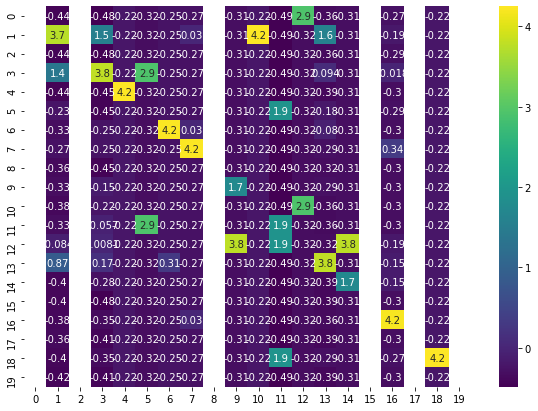

In [24]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix
df_cm = pd.DataFrame(array)
df_norm_col=(df_cm-df_cm.mean())/df_cm.std()
#df_norm_col=df_cm-df_cm.mean()
plt.figure(figsize = (10,7))
sn.heatmap(df_norm_col, annot=True,cmap='viridis')